In [36]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.utils import np_utils

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv("dataset/fer2013.csv")

In [38]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [39]:
df.shape

(35887, 3)

In [40]:
#set(df["Usage"])
df.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [41]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

# private test implies testing ... and public test implies validation set...

In [42]:
# let's have a look at our classes i.e labels

emotions = {

    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"

}

emotions_count = df["emotion"].value_counts(sort=False).reset_index()
emotions_count.columns = ["emotion", "number"]
emotions_count["emotion"] = emotions_count["emotion"].map(emotions)

# let's print emotions_count
emotions_count

,emotion,number
0,Angry,4953
1,Disgust,547
2,Fear,5121
3,Happy,8989
4,Sad,6077
5,Surprise,4002
6,Neutral,6198


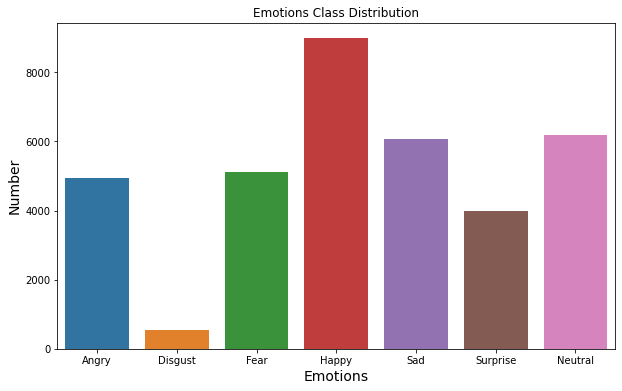

In [43]:
# let's plot a bar graph for labels

plt.figure(figsize=(10, 6))

sns.barplot(emotions_count.emotion, emotions_count.number)
plt.title("Emotions Class Distribution")
plt.xlabel("Emotions", fontsize=14)
plt.ylabel("Number", fontsize=14)

plt.show()

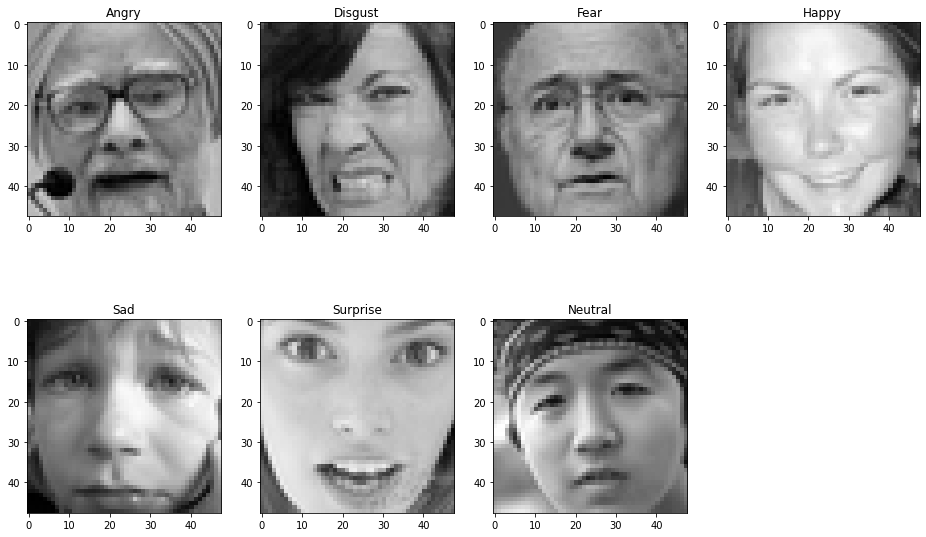

In [44]:
# let's have a look at few images

# this function will give us the image and resultant emotion of that image
def row2image(row):
    
    pixels, emotion = row["pixels"], emotions[row["emotion"]]
    img = np.array(pixels.split())
    img = img.reshape(48, 48)
    image = np.zeros((48, 48, 3))
    image[:, :, 0] = img
    image[:, :, 1] = img
    image[:, :, 2] = img
    
    return np.array([image.astype(np.uint8), emotion])

# plotting the images
plt.figure(0, figsize=(16, 10))
for i in range(1, 8):
    # grabbing the location of second images of each class... desire to see other images? .. simply change the index value of iloc
    face = df[df["emotion"] == i - 1].iloc[1]
    img = row2image(face)
    plt.subplot(2, 4, i)
    plt.imshow(img[0])
    plt.title(img[1])

plt.show()

In [45]:
#split data into training, validation and test set

data_train = df[df['Usage']=='Training'].copy()
data_val   = df[df['Usage']=='PublicTest'].copy()
data_test  = df[df['Usage']=='PrivateTest'].copy()

print("[INFO] Train-Shape: {}, \n[INFO] Validation-Shape: {}, \n[INFO] Test-Shape: {}".format(data_train.shape, data_val.shape, data_test.shape))

[INFO] Train-Shape: (28709, 3), 
[INFO] Validation-Shape: (3589, 3), 
[INFO] Test-Shape: (3589, 3)


In [46]:
# defining parameters

lr = 0.001
num_classes = 7
width = 48
height = 48
num_epochs = 220
batch_size = 100

In [47]:
# preprocessing our data with segregation

def CRNO(dfx, dataName, le):
    
    # converting the pixel values data type from string to int
    dfx['pixels'] = dfx['pixels'].apply(lambda pixel_sequence: [int(pixel) for pixel in pixel_sequence.split()])    
    
    # reshape images and normalise image with 255.0
    data_X = np.array(dfx["pixels"].tolist(), dtype="float32").reshape(-1, width, height, 1) / 255.0
    
    # one-hot encoding label, e.g. class 3 to [0,0,0,1,0,0,0]
    data_Y = le.fit_transform(dfx["emotion"])
    data_Y = np_utils.to_categorical(y=data_Y, num_classes=num_classes)
    
    print("[INFO] ", dataName, "_X shape: {},", dataName, "_Y_shape: {}".format(data_X.shape, data_Y.shape))
    
    return data_X, data_Y

In [48]:
train_le = LabelEncoder()
val_le = LabelEncoder()
test_le = LabelEncoder()

trainX, trainY = CRNO(data_train, "train", train_le)
valX, valY = CRNO(data_val, "val", val_le)
testX, testY = CRNO(data_test, "test", test_le)

[INFO]  train _X shape: {}, train _Y_shape: (28709, 48, 48, 1)
[INFO]  val _X shape: {}, val _Y_shape: (3589, 48, 48, 1)
[INFO]  test _X shape: {}, test _Y_shape: (3589, 48, 48, 1)


In [49]:
data_train['pixels']

0        [70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4...
1        [151, 150, 147, 155, 148, 133, 111, 140, 170, ...
2        [231, 212, 156, 164, 174, 138, 161, 173, 182, ...
3        [24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2...
4        [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23...
                               ...                        
28704    [84, 85, 85, 85, 85, 85, 85, 85, 86, 86, 86, 8...
28705    [114, 112, 113, 113, 111, 111, 112, 113, 115, ...
28706    [74, 81, 87, 89, 95, 100, 98, 93, 105, 120, 12...
28707    [222, 227, 203, 90, 86, 90, 84, 77, 94, 87, 99...
28708    [195, 199, 205, 206, 205, 203, 206, 209, 208, ...
Name: pixels, Length: 28709, dtype: object

In [50]:
data_val['pixels']

28709    [254, 254, 254, 254, 254, 249, 255, 160, 2, 58...
28710    [156, 184, 198, 202, 204, 207, 210, 212, 213, ...
28711    [69, 118, 61, 60, 96, 121, 103, 87, 103, 88, 7...
28712    [205, 203, 236, 157, 83, 158, 120, 116, 94, 86...
28713    [87, 79, 74, 66, 74, 96, 77, 80, 80, 84, 83, 8...
                               ...                        
32293    [178, 176, 172, 173, 173, 174, 176, 173, 166, ...
32294    [25, 34, 42, 44, 42, 47, 57, 59, 59, 58, 54, 5...
32295    [255, 255, 255, 255, 255, 255, 255, 255, 255, ...
32296    [33, 25, 31, 36, 36, 42, 69, 103, 132, 163, 17...
32297    [61, 63, 59, 75, 151, 159, 166, 161, 143, 170,...
Name: pixels, Length: 3589, dtype: object

In [51]:
data_test['pixels']

32298    [170, 118, 101, 88, 88, 75, 78, 82, 66, 74, 68...
32299    [7, 5, 8, 6, 7, 3, 2, 6, 5, 4, 4, 5, 7, 5, 5, ...
32300    [232, 240, 241, 239, 237, 235, 246, 117, 24, 2...
32301    [200, 197, 149, 139, 156, 89, 111, 58, 62, 95,...
32302    [40, 28, 33, 56, 45, 33, 31, 78, 152, 194, 200...
                               ...                        
35882    [50, 36, 17, 22, 23, 29, 33, 39, 34, 37, 37, 3...
35883    [178, 174, 172, 173, 181, 188, 191, 194, 196, ...
35884    [17, 17, 16, 23, 28, 22, 19, 17, 25, 26, 20, 2...
35885    [30, 28, 28, 29, 31, 30, 42, 68, 79, 81, 77, 6...
35886    [19, 13, 14, 12, 13, 16, 21, 33, 50, 57, 71, 8...
Name: pixels, Length: 3589, dtype: object

In [52]:
# Let's create a CNN

# importing required packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as bk

In [53]:
class ExpressionNet:
    
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with input shape to be channels last and channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1
        
        # if we are using "channels first", update the input shape
        # and channels dimension
        
        if bk.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
        
        # Lets start adding layers to our CNN
        # first CONV => RELU => CONV => RELU => POOL layer set
        
        model.add(Conv2D(16, (3, 3), padding="same", input_shape=inputShape))
        model.add(Activation(activation="relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(16, (3, 3), padding="same"))
        model.add(Activation(activation="relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(rate=0.25))
        
        # second CONV => RELU => CONV => RELU => POOL layer set
       
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation(activation="relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation(activation="relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate=0.25))

        # third CONV => RELU => CONV => RELU => POOL layer set
        
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation(activation="relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation(activation="relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate=0.25))
        
        # first set of FC => RELU layers
        
        model.add(Flatten())
        model.add(Dense(units=64))
        model.add(Activation(activation="relu"))
        model.add(BatchNormalization())
        model.add(Dropout(rate=0.5))
       
        # second set of FC => RELU layers
        
        model.add(Dense(units=32))
        model.add(Activation(activation="relu"))
        model.add(BatchNormalization())
        model.add(Dropout(rate=0.5))
        
        # third set of FC => RELU layers
        
        model.add(Dense(units=16))
        model.add(Activation(activation="relu"))
        model.add(BatchNormalization())
        model.add(Dropout(rate=0.5))
        
        # sofmax Classifier
        
        model.add(Dense(classes))
        model.add(Activation(activation="softmax"))
        
        # now let's return our model
        return model

In [54]:
# importing required packages for training model

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import pickle

In [55]:
# construct the training image generator for data augmentation
# aug will be used further to generate images from our data
# Early stopping is used to monitor the model training and stop the process if model training sees no imporovement

aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")
es = EarlyStopping(monitor='val_loss', patience = 45, mode = 'min', restore_best_weights=True)

In [56]:
# Initializing the optimizer and compiling model

print("[INFO] compiling model...")
opt = Adam(lr=lr, decay=lr/num_epochs)
model = ExpressionNet.build(width=width, height=height, depth=1, classes=num_classes)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 16)        160       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 16)        2320      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 16)       

In [58]:
# let's begin training

print("[INFO] training network for : {} epochs...".format(num_epochs))
res = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), callbacks=[es], validation_data=(valX, valY), steps_per_epoch=len(trainX)//batch_size, epochs=num_epochs)

[INFO] training network for : 220 epochs...
Epoch 1/220
287/287 [==============================] - 30s 103ms/step - loss: 2.3306 - accuracy: 0.1748 - val_loss: 1.8343 - val_accuracy: 0.2494
Epoch 2/220
287/287 [==============================] - 25s 87ms/step - loss: 1.9398 - accuracy: 0.2206 - val_loss: 1.8048 - val_accuracy: 0.2502
Epoch 3/220
287/287 [==============================] - 25s 88ms/step - loss: 1.8436 - accuracy: 0.2451 - val_loss: 1.7824 - val_accuracy: 0.2588
Epoch 4/220
287/287 [==============================] - 25s 89ms/step - loss: 1.8098 - accuracy: 0.2556 - val_loss: 1.7694 - val_accuracy: 0.2633
Epoch 5/220
287/287 [==============================] - 25s 89ms/step - loss: 1.7965 - accuracy: 0.2583 - val_loss: 1.7657 - val_accuracy: 0.2608
Epoch 6/220
287/287 [==============================] - 25s 88ms/step - loss: 1.7853 - accuracy: 0.2634 - val_loss: 1.7519 - val_accuracy: 0.2644
Epoch 7/220
287/287 [==============================] - 25s 89ms/step - loss: 1.7693 -

# If The Training Stops Early that will happen because of Early-Stopping

In [61]:
# Evaluating the network

print("[INFO] Evaluating the Network...")
predictions = model.predict(testX, batch_size=batch_size)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]))

[INFO] Evaluating the Network...
              precision    recall  f1-score   support

       Angry       0.59      0.45      0.51       491
     Disgust       0.00      0.00      0.00        55
        Fear       0.52      0.15      0.23       528
       Happy       0.87      0.85      0.86       879
         Sad       0.48      0.32      0.39       594
    Surprise       0.67      0.82      0.73       416
     Neutral       0.41      0.85      0.56       626

    accuracy                           0.59      3589
   macro avg       0.51      0.49      0.47      3589
weighted avg       0.60      0.59      0.56      3589



In [62]:
# Saving our model to Disk

print("[INFO] Saving Trained Model to Disk...")
model.save("ExpressionNet.model")

[INFO] Saving Trained Model to Disk...


In [63]:
import joblib
joblib.dump(model, "ExpressionNet_Model.sav")

['ExpressionNet_Model.sav']

In [64]:
# Save the Label Encoder to Disk as well

print("[INFO] Saving Label Encodings to Disk...")
f = open("le.pickle", "wb")
f.write(pickle.dumps(train_le))
f.close()

[INFO] Saving Label Encodings to Disk...


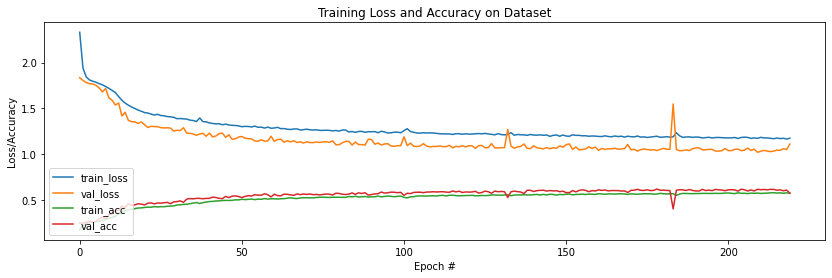

In [65]:
# let's plot a graph for our training process

plt.figure(figsize=(14, 4))

plt.plot(np.arange(0, num_epochs), res.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), res.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), res.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), res.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

plt.show()